# **Assignment 3: LMMs**

For this assignment, you will be using colab.

Please complete and submit this assignment by February 21, 11:59 PM. Download and
submit the .ipynb file and share the notebook with the TA (swetha.sirnam@ucf.edu and
swethacrcv@gmail.com)

## Useful Resources:

**PyTorch Colab Documentation:**
https://pytorch.org/tutorials/beginner/colab.html

**HuggingFace Sample Notebooks:**
https://huggingface.co/docs/transformers/en/notebooks

**LlaVA-OneVision**
Model Doc:
https://huggingface.co/docs/transformers/en/model_doc/llava_onevision
Weights: https://huggingface.co/lmms-lab/llava-onevision-qwen2-0.5b-ov

**PaliGemma**
Model Doc: https://huggingface.co/docs/transformers/en/model_doc/paligemma
Weights: https://huggingface.co/google/paligemma-3b-mix-224

**Qwen2VL**
Model Doc: https://huggingface.co/docs/transformers/en/model_doc/qwen2_vl
Weights: https://huggingface.co/Qwen/Qwen2-VL-2B-Instruct\
Full Family: https://huggingface.co/collections/Qwen/qwen2-vl-
66cee7455501d7126940800d


Sample Image: http://images.cocodataset.org/val2017/000000039769.jpg


**Platinum Bench**
Dataset: https://huggingface.co/datasets/madrylab/platinum-bench
Paper: https://arxiv.org/abs/2502.03461


## Tasks:

1. Setup a Google Colab and load the above 3 models onto GPU from huggingface
and show memory usage for each model. **[10 points]**

2. Run inference on all 3 models on the sample image above to generate detailed
description. **[10 points]**

3. Evaluate each model successively on the clean (consensus + verified +
revised ) part of platinum bench’s vqa and gsm8k subsets [3 x 10 + 3 x 10 = 60
points]

4. Scaling experiments: Evaluate on vqa and gsm8k subsets (as in Task 3) on
Qwen2VL and analyze the impact of scaling, compare the performance and
inference time. [2 x 10 = 20 points]


# Import Packages

In [2]:
# Install HuggingFace in system if not installed
%pip install python-dotenv
%pip install git+https://github.com/huggingface/transformers
%pip install --upgrade huggingface_hub
%pip install --upgrade diffusers transformers accelerate mediapy peft pytorch_fid
%pip install torch torchvision torchaudio
%pip install pillow
%pip install requests
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install tensorflow

# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 


# Set model cache location 
import os
os.environ['HF_HOME'] = os.getenv("CACHE_LOCATION")
!export HF_HOME={os.getenv("CACHE_LOCATION")}


# Login to HuggingFace
# This code will save huggingface token to PC, but your PC first has to have github token stored in pc
!huggingface-cli login --token {os.getenv("HUGGINGFACE_TOKEN")} --add-to-git-credential

# Import packages
# Next import packages. These packages are already preinstalled in Google Colab
import torch # This is a package for providing tensor-computation and prebuilt deep neural networks
from PIL import Image # The Image module provides a class to represent a PIL Image. You can use this module to load images from files, create new images, and do some image editing
import requests # Module that allows you to do HTTP requests easily
import matplotlib.pyplot as plt # Module that allows visualizations for images, math,tensors, etc...
import pandas as pd, numpy as np # Package that provides fast, flexible and expressive data structures desgined for working with labeled and unlabeled data for data analysis
import tensorflow as tf # For high performance numerical computations using CPUs, GPUs and TPUs
import os # Module for using operating system dependent functionality
import urllib.request # Defines functions and classes for opening URLs
#from IPython.display import display, Markdown, HTML, clear_output
#import ipywidgets as widgets




Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-dnmm49gv
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-dnmm49gv
  Resolved https://github.com/huggingface/transformers to commit 27d1707586c38895ef3b64cb0163645f5b8fd688
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need 

In [3]:
# Prints out the location that the models are downloaded to
print(os.getenv("CACHE_LOCATION"))

/mnt/Storage02/SoftwareDev/huggingface/cache/


## Import LlaVA-OneVision Model and Check GPU Usage


In [ ]:
from transformers import AutoProcessor, LlavaOnevisionForConditionalGeneration
import torch

llava_model_id = "llava-hf/llava-onevision-qwen2-7b-ov-hf"
llava_processor = AutoProcessor.from_pretrained(llava_model_id, device_map="auto") 
llava_model = LlavaOnevisionForConditionalGeneration.from_pretrained(
    llava_model_id,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    device_map="auto"
)

/home/malneyugfl/anaconda3/envs/huggingface/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
Loading checkpoint shards: 100%|██████████| 4/4 [00:31<00:00,  7.83s/it]


In [4]:
# Check GPU Memory Usage
!nvidia-smi

Thu Feb 20 02:35:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 33%   40C    P2            121W /  350W |    7984MiB /  24576MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **At half-precision, Llava-OneVision uses about 16.4GB of VRAM**

## Import PaliGemma Model and Check GPU Usage

In [4]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

paligemma_model_id = "google/paligemma-3b-mix-224"
paligemma_processor = AutoProcessor.from_pretrained(paligemma_model_id,
                                                    device_map="auto")
paligemma_model = PaliGemmaForConditionalGeneration.from_pretrained(paligemma_model_id,
    device_map="auto")


/home/malneyugnfl/anaconda3/envs/huggingface/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


In [6]:
# Check GPU Memory Usage
!nvidia-smi

Thu Feb 20 02:36:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 33%   41C    P2            120W /  350W |   14695MiB /  24576MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **Paligemma uses about 5.7 GB of VRAM at half-precision**

## Import Qwen2VL Model and Check GPU Usage

In [ ]:
import torch
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor

qwen2vl_model_id= "Qwen/Qwen2-VL-7B-Instruct"
qwen2vl_processor = AutoProcessor.from_pretrained(qwen2vl_model_id, device_map="auto")
qwen2vl_model = Qwen2VLForConditionalGeneration.from_pretrained(
    qwen2vl_model_id,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True,
    device_map="auto" 
    )


Loading checkpoint shards: 100%|██████████| 5/5 [00:53<00:00, 10.67s/it]


In [8]:
# Check GPU Memory Usage
!nvidia-smi

Thu Feb 20 02:37:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 35%   40C    P2             59W /  350W |   22008MiB /  24576MiB |     14%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### **At half precision, Qwen2vl uses about 16 GB of VRAM**

## Run Inference using each model on the Sample Image

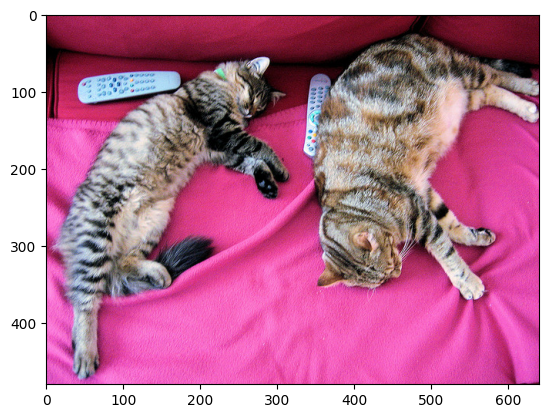

In [6]:
# Load Sample Image and Display
# URL for Image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"

# Load Image
image = Image.open(requests.get(url, stream=True).raw)

plt.imshow(image)


### Run Inference using Llava

In [10]:
# prepare image and text prompt, using the appropriate prompt template
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": url},
            {"type": "text", "text": "What is shown in this image?"},
        ],
    },
]
inputs = llava_processor.apply_chat_template(conversation, add_generation_prompt=True, tokenize=True, return_dict=True, return_tensors="pt")
inputs = inputs.to(qwen2vl_model.device)

# autoregressively complete prompt
output = llava_model.generate(**inputs, max_new_tokens=200)
print(llava_processor.decode(output[0], skip_special_tokens=True))
'user\n\nWhat is shown in this image?\nassistant\nThe image shows a radar chart, also known as a spider chart or a star chart, which is used to compare multiple quantitative variables. Each axis represents a different variable, and the chart is filled with'

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


user 
What is shown in this image?assistant
cat


'user\n\nWhat is shown in this image?\nassistant\nThe image shows a radar chart, also known as a spider chart or a star chart, which is used to compare multiple quantitative variables. Each axis represents a different variable, and the chart is filled with'

### Run Inference using Paligemma

In [8]:
prompt = "What is shown in this image?"

inputs = paligemma_processor(image, prompt, return_tensors="pt").to(paligemma_model.device)
output = paligemma_model.generate(**inputs, max_new_tokens=200)

print(paligemma_processor.decode(output[0], skip_special_tokens=True)[len(prompt):])



You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.



Two cats, a black and white one and a brown and black one, are sleeping soundly on a pink blanket. The cats are laying down on their sides, their tails swishing. The blanket is wrinkled and the remote controls are on the couch. The cats' eyes are closed and their paws are resting. The tail of the black and white cat is black and the tail of the brown and black cat is also black. The cats are two in number and they are male and female.


### Run Inference on Qwen2vl

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
prompt = "What is shown in this image?"
conversation = [
    {
        "role":"user",
        "content":[
            {
                "type":"image",
                "url": url
            },
            {
                "type":"text",
                "text":prompt
            }
        ]
    }
]

inputs = qwen2vl_processor.apply_chat_template(
    conversation,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(qwen2vl_model.device, torch.float16 )

# Inference: Generation of the output
output_ids = qwen2vl_model.generate(**inputs, max_new_tokens=128)
generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs.input_ids, output_ids)]
output_text = qwen2vl_processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
print(output_text)

['The image shows two cats sleeping on a pink blanket.']


## Evaluate each Model on the clean platinum bench's vqa and gsm8k subsets

## Evaluate on vqa and gsm8k subsets (as in Task 3) on Qwen2VL]